## Statistics about current data

In [ ]:
# read all csv from ../pose_outputs_loss
import os
import pandas as pd

pose_outputs_dir = os.path.join(os.pardir, 'pose_outputs_loss')
csv_files = [f for f in os.listdir(pose_outputs_dir) if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(pose_outputs_dir, f)) for f in csv_files]
print(f"Loaded {len(dfs)} CSV files from {pose_outputs_dir}")


Loaded 77 CSV files from ../pose_outputs_loss


In [2]:
# Summary: number of records in each file
file_record_counts = {f: len(df) for f, df in zip(csv_files, dfs)}
for fname, count in file_record_counts.items():
    print(f"{fname}: {count} records")

trimmed_noaudio20240224173004004_0.csv: 4794 records
trimmed_noaudio20240319124022018_3.csv: 579 records
trimmed_noaudio20240320134611025_0.csv: 1983 records
trimmed_noaudio20240322095516036_0.csv: 1215 records
trimmed_noaudio20240225131705007_0.csv: 955 records
trimmed_noaudio20240225145123011.csv: 1293 records
trimmed_noaudio20240225131705007_1.csv: 1215 records
trimmed_noaudio20240320111755023.csv: 1753 records
trimmed_noaudio20240322095516036_1.csv: 2262 records
trimmed_noaudio20240320134611025_1.csv: 555 records
trimmed_noaudio20240319124022018_2.csv: 1408 records
trimmed_noaudio20240224173004004_1.csv: 3832 records
trimmed_noaudio20240319124022018_0.csv: 825 records
trimmed_noaudio20240225124401005.csv: 6276 records
trimmed_noaudio20240225131705007_3.csv: 411 records
trimmed_noaudio20240225131705007_2.csv: 2400 records
trimmed_noaudio20240320134611025_2.csv: 1387 records
trimmed_noaudio20240319124022018_1.csv: 687 records
trimmed_noaudio20240322100957038.csv: 1225 records
trimmed

/var/folders/7j/_mf7cz993nvdqnr770m9bht40000gn/T/ipykernel_32430/641194955.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  bin_counts = pd.value_counts(file_bins, sort=False)


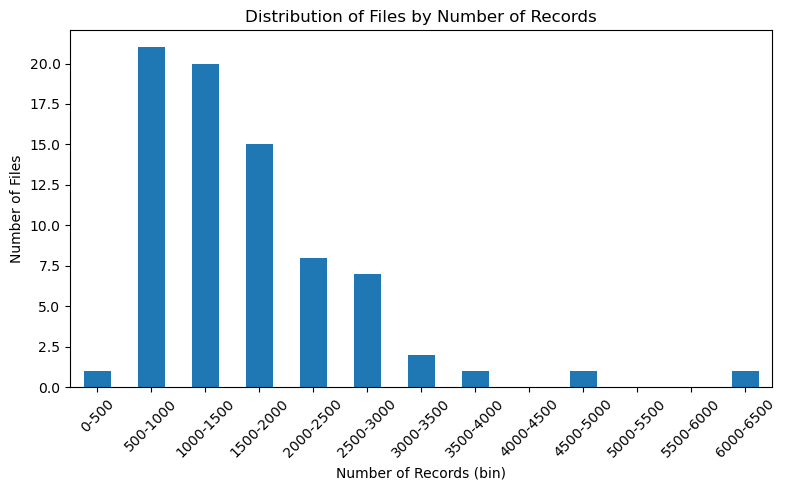

In [4]:
# Group files by number of records into bins and plot the distribution
import numpy as np

# Define bins (0-500, 500-1000, ... up to the max count)
max_count = max(file_record_counts.values())
bins = np.arange(0, max_count + 500, 500)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Assign each file to a bin
file_bins = pd.cut(list(file_record_counts.values()), bins=bins, labels=labels, right=False)
bin_counts = pd.value_counts(file_bins, sort=False)

plt.figure(figsize=(8, 5))
bin_counts.plot(kind='bar')
plt.xlabel('Number of Records (bin)')
plt.ylabel('Number of Files')
plt.title('Distribution of Files by Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()